

# Stærðfræði og reiknifræði – Skilaverkefni 11

Þetta verkefni er tvískipt. Hluta A og B skal leysa í Jupyter og skila PDF-skjali sem búið er til í vafra undir S11AB í Canvas, en hluta C skal leysa með blaði og blýanti, taka mynd og hlaða upp sérstaklega undir S11C.

# A. Tvívíð tölvugrafík
Í þetta verkefni snýst um tvívíðra tölvugrafík, sbr. kafla 5.2 í fyrirlestrarnótum. Við hugsum okkur að flatarmynd sé lýst með $2 \times n$ fylki; efri röðin með $x$-hnitum og sú neðri með $y$-hnitum á punktum sem á að tengja saman með línustrikum. Auk þess er hægt að "lyfta pennanum" og hoppa á nýjan stað með því að hafa dálk af svokölluðum *ekki-tölum* (*not-a-number*) sem má búa til með `nan` í Python eftir innflutning `from math import nan`. Hér er dæmi um fylki sem lýsir rétthyrningi með striki inni í sér:

$$ M = \begin{pmatrix}
0 & 3 & 3 & 0 & 0 & \text{nan} & 1 & 2 \\
0 & 0 & 2 & 2 & 0 & \text{nan} & 1 & 1
\end{pmatrix}$$

Nú er hægt að snúa myndinni, spegla hana, og toga til með því að margfalda með viðeigandi snúnings-, skölunar-, skekkingar- og speglunarfylkjum, sbr. grein [4.9.4](https://cs.hi.is/strei/kafli04.html#linulegar-varpanir-a-bbb-r-2) í fyrirlestranótum. Ef við skilgreinum til dæmis snúnings- og skölunarfylkin:

$$
R = \begin{pmatrix} \cos 30° & -\sin 30° \\ \sin 30° & \cos 30° \end{pmatrix}\; \text{ og }\;
S = \begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}
$$

þá verður $SRM$ $2 \times 8$ fylki sem lýsir myndinni sem fæst með því að snúa 30° rangsælis um $(0,0)$ og skala svo um 2 í $x$-stefnu. 

Með því að leggja hliðrunarvigur við alla dálka í fylki áður en teiknað er má svo færa myndina til í hnitakerfinu. Næsti reitur skilgreinir fall til að teikna flatarmynd sem ræður líka við hliðrun. Reiturinn sýnir líka dæmi um notkun.

Help on function teiknaFylki in module __main__:

teiknaFylki(A, hliðrun=0)
    Teiknar 2 x n flatarmyndarfylki A óhliðrað (líka má nota 'teiknaFylki(A)' til þess).
    Teiknafylki(A, hliðrun = hx) teiknar A hliðrað um hx í x-stefnu.
    Teiknafylki(A, hliðrun = (hx, hy)) teiknar A hliðrað um hx í x-stefnu og hy í y-stefnu.



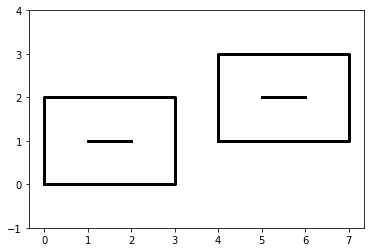

In [13]:
## FALL FYRIR TVÍVÍÐA TEIKNINGU
import matplotlib.pyplot as plt, numpy as np
from math import nan
def teiknaFylki(A, hliðrun = 0):
    """Teiknar 2 x n flatarmyndarfylki A óhliðrað (líka má nota 'teiknaFylki(A)' til þess).
    Teiknafylki(A, hliðrun = hx) teiknar A hliðrað um hx í x-stefnu.
    Teiknafylki(A, hliðrun = (hx, hy)) teiknar A hliðrað um hx í x-stefnu og hy í y-stefnu.
    """
    if isinstance(hliðrun, tuple): x,y = hliðrun
    else:                          x,y = hliðrun,0
    plt.plot(*(A + [[x],[y]]), lw=3, color='k')

help(teiknaFylki)

A = np.array([[0,3,3,0,0,nan,1,2],[0,0,2,2,0,nan,1,1]]);
plt.axis('equal')
teiknaFylki(A)
teiknaFylki(A, hliðrun = (4,1))

## U11-a. Sammiðja rétthyrningar
1. Búið til fylki fyrir rétthyrning sem er 5 x 3 að stærð með minni rétthyrning sem er 3 x 1 að stærð í miðjunni (stærri rétthyrningurinn hefur neðra vinstra horn í $(0,0)$ en sá minni í $(1,1)$). Teiknið myndina sem kemur út með `teiknaFylki`.

In [ ]:
#ua1

2. Skrifið fall `snúa(x)` sem skilar snúningsfylki sem snýr um 30° rangsælis (munið eftir m.radians). Prófið fallið með því að teikna myndina í lið 1 snúna um +30°.

In [ ]:
#ua2

## S11-A. Þríhyrningur með hæð

1. Búið til fylki T sem lýsir þríhyrningi með hornpunkta $A = (1,0)$, $B = (3,2)$ og $C = (4,0)$ með lóðréttu striki (hæð) frá $B$ niður á hliðina $AC$. Teiknið.

In [ ]:
#A1

2. Teiknið samsetta mynd með fjórum eintökum af þessum þríhyrningi, snúnum um 0°, 90°, 180° og 270°.

In [ ]:
#A2

3. Skrifið fall `skala(sx,sy)` sem skilar skölunarfylki sem skalar með `sx` í $x$-stefnu og `sy` í $y$-stefnu. Bætið við lið 2 áhrifum skölunar um $1.5$ í $x$-stefnu og $0.5$ í $y$-stefnu.

In [ ]:
#A3

## B  Teikning bókstafa
Hér er reitur sem skilgreinir fall `lesaStafahnit` sem les (úr skrá [stafrof.txt](http://cs.hi.is/strei/stafrof.txt) á cs.hi.is) alls 36 tveggja línu fylki sem hvert um sig lýsir lögun bókstafs í íslenska stafrófinu (þ.m.t. Q og Z; það eru bara stórir stafir). Fallið skilar niðurstöðunni í svonefndu "dictionary" þannig að eftir framkvæmd skipananna:

    sh = lesaStafahnit()
    M1 = sh["A"]
    M2 = sh["Á"]
    
þá eru `M1` og `M2` tveggja línu fylki með lögun bókstafanna A og Á; o.s.frv. fyrir aðra bókstafi. Allir stafirnir passa inn í svæðið $[0,8] \times [0,14]$ í teiknihnitakerfinu. Á eftir fallinu er dæmi um notkun.

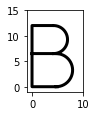

In [12]:
import numpy as np, matplotlib.pyplot as plt
from urllib.request import urlopen

def lesaStafahnit():
    """Les skrá með hnitum bókstafa og skilar "dictionary" sh þannig að
    sh[s] er 2 sinnum n fylki sem lýsir bókstafnum s, öll x-hnit eru á
    bilinu 0 til 8 og y-hnit á bilinu 0 til 14. Hver bókstafur hefur þrjár 
    línur í skránni, sú fyrsta með stafnum sjálfum, sú næsta með x-hnitum 
    og sú þriðja með y-hnitum. Skráin byrjar á:

        A
        0  4 8 nan 2 6 
        0 12 0 nan 6 6 
        Á
        0  4 8 nan 2 6 nan  3.5  5.5
        0 12 0 nan 6 6 nan 12.0 14.0

    Til að teikna A má nú kalla á teiknaFylki(sh["A"]) og til að teikna B
    þar fyrir aftan má kalla á teiknafylki(sh["B"], 10)
    """
    def lesap(f): 
        """Lókal fall sem les línu með tölum úr skrá"""
        a = np.array([float(k) for k in f.readline().decode('utf-8').split()])
        return a
    def næstiStafur(f): 
        """Lókal fall sem les þrjár línur með staf og hnitum hans úr f"""
        line = f.readline().decode('utf-8')
        if not line: return None, None
        stafur = line.split()[0]
        punktar = np.array([lesap(f), lesap(f)])
        return stafur, punktar
    
    sh = dict()
    f = urlopen('http://cs.hi.is/strei/stafrof.txt')
    while True:
        stafur, pkt = næstiStafur(f)
        if stafur is None: break
        sh[stafur] = pkt
    return sh

#Dæmi um notkun:
sh = lesaStafahnit()
MB = sh["B"]
plt.figure(figsize = (1,1.5))
plt.axis((-1,10,-1,15))
teiknaFylki(MB)

## U11-b. Teikning Æ og Y
1. Keyrið reitina að ofan og notið í framhaldi `teiknaFylki` til að teikna bókstafinn Æ og svo Y þar fyrir aftan <br> (það nægir það nota 1 x 1 tommu reit: `plt.figure(figsize=(1,1))`). 

In [ ]:
#ub1

2. Snúið hvorum bókstaf um 45° <br> (notið `rot` úr A-lið, og kallið á `plt.gca().axis('equal')` áður en þið teiknið)

In [ ]:
#ub2

## S11-B. Meiri teikning bókstafa
1. Teiknið nafnið ykkar. Þið getið notað t.d. `for (i,s) in enumerate("KRISTJÁN"):` ...

2. Teiknið nafnið ykkar með skáletri með því að nota hæfilegt skekkingarfylki eins og lýst er í grein [5.2](https://cs.hi.is/strei/kafli05.html?highlight=skekkingarfylki#fylkjamargfoldun-og-tolvugrafik) í fyrirlestranótum.

3. Teiknið allt íslenska stafrófið í tvær línur. Byrjið á að búa til mynd sem er 18 x 4 tommur og látið $x$-ás ná frá $0$ til $180$ og $y$-ás frá $0$ til $40$ með:

       plt.figure(figsize = (18,4)
       plt.axis((0,180,0,40))
   
   Búið til streng með stafrófinu með 
   
       stafróf = "AÁBCDÐEÉFGHIÍJKLMNOÓPQRSTUÚVWXYÝZÞÆÖ"
   
   Hér er reiknirit fyrir teikninguna:
   
       y = 20
       n = lengd(stafróf)
       fyrir i = 1, ..., n
          teikna stafróf[i]
          ef i = n/2:
             
          
   Byrjað er með $y=20$ og fyrsti stafurinn fer í hnit (= hliðrun í `teiknaFylki`) $(1,y)$ sá næsti í $(11,y)$ o.s.frv. Þegar búið er að teikna helminginn af stöfunum er $y$ sett $=1$ og aftur byrjað lengst til vinstri með $x=1$. 

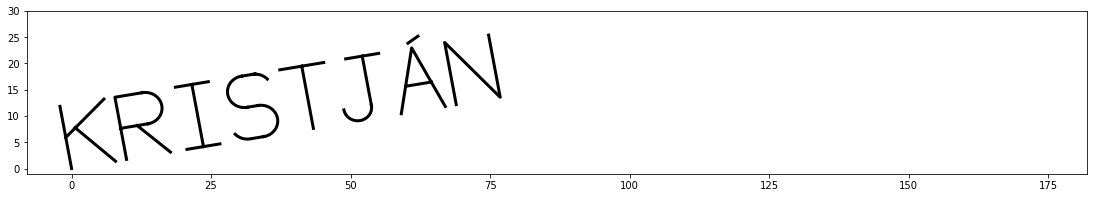

In [104]:
from math import nan,cos,sin,radians
def bætaViðStaf(X, S, hliðrun = 0):
    """Bætir 2ja línu fylki S aftan á 2ja línu fylki X og setur dálk
    með nan á milli nema þegar X er tómt í byrjun.
    bætaViðStaf(X, S, hliðrun=k) hliðrar S fyrst um k einingar til hægri 
    """
    if X.size == 0: X = S
    else:           X = np.c_[X, [nan,nan], S + [[hliðrun],[0]]]
    return X

def snúa(x):
    t = radians(x)
    return [[cos(t), -sin(t)],[sin(t), cos(t)]]

plt.figure(figsize = (19,3))
plt.axis((-8,182,-1,30))
sh = lesaStafahnit()
X = np.empty((2,0))
for i,s in enumerate("KRISTJÁN"):
    X = bætaViðStaf(X, sh[s], i*10)
teiknaFylki(rot(10) @ X)

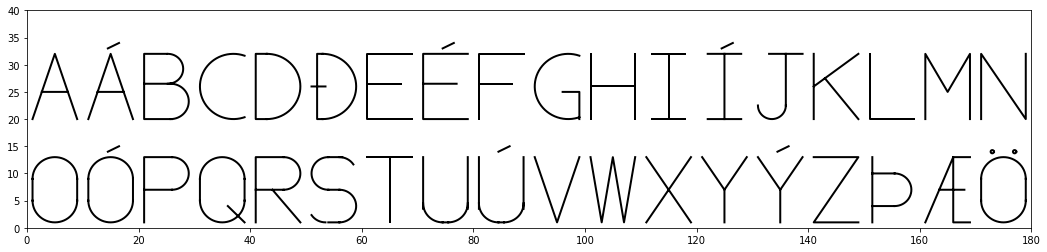

In [13]:
def teiknaStafróf():
    """Teiknar íslenska stafrófið"""
    SH = lesaStafahnit()
    plt.figure(figsize=(18,4))
    plt.axis((0,180,0,40)) # (xmin,xmax,ymin,ymax), sömu hlutföll og figsize
    stafróf = 'AÁBCDÐEÉFGHIÍJKLMNOÓPQRSTUÚVWXYÝZÞÆÖ'
    (x,y) = (1,20) # Staðsetning A
    M = np.array([[1, 0], [0, 1]])
    for s in stafróf:
        S = SH[s]
        teiknaFylki(S, (x,y))
        x += 10 # Einn reit til hægri
        if x > 171: (x,y) = (1,1) # Fara í næstu línu á eftir N
            
teiknaStafróf()